In [1]:
import pandas as pd
import numpy as np
import numba
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('ps.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


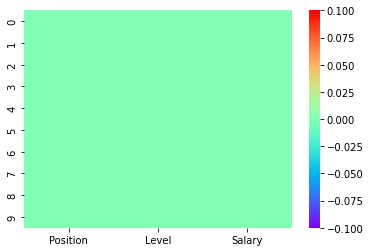

In [5]:
sns.heatmap(df.isnull(), yticklabels = True, cmap = 'rainbow')

In [6]:
X = df.iloc[:,1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [7]:
Y = df.iloc[:,2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


**LINEAR REGRESSION**

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

**PLOTTING THE GRAPH FOR LINEAR REGRESSION**

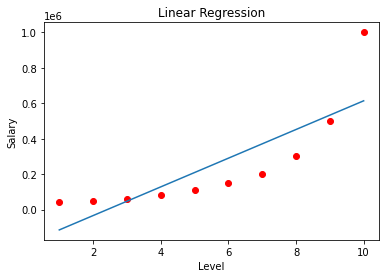

In [10]:
plt.scatter(X,Y, color="red")
plt.plot(X, lin_reg.predict(X))
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [11]:
# Step 4 Linear Regression prediction
lin_reg.predict([[6.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[330378.78787879]])

**POLYNOMIAL REGRESSION** **DEGREE 2**

In [13]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [15]:
# Step 6 - Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)

LinearRegression()

**PLOTTING GRAPH FOR POLYNOMIAL REGRESSION**

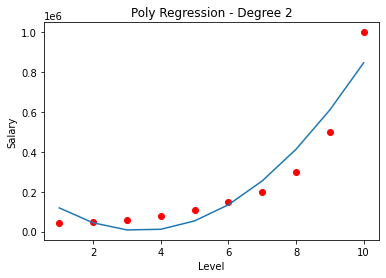

In [16]:
plt.scatter(X,Y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression - Degree 2")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [17]:
# Step 8 Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print('The predicted salary of a person at 6.5 Level is ',new_salary_pred)

The predicted salary of a person at 6.5 Level is  [[189498.10606061]]


**DEGREE 3**

In [19]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [21]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)

LinearRegression()

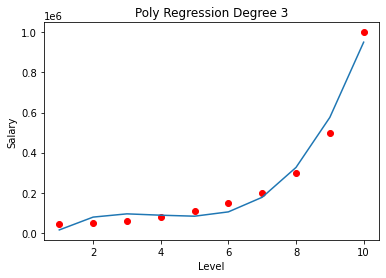

In [22]:
plt.scatter(X,Y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 3")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [23]:
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print('The predicted salary of a person at 6.5 Level is ',new_salary_pred)

The predicted salary of a person at 6.5 Level is  [[133259.46969697]]


**DEGREE 5**

In [47]:
PF = PolynomialFeatures(degree=5)
X = PF.fit_transform(X)
X

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train
Y_train
Y_test
X_test

array([[1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01]])

In [49]:
PR5 = LinearRegression()
PR5.fit(X_train, Y_train)
y_pred = PR5.predict(X_test)
score = r2_score(Y_test, y_pred)
score

0.9950481764354951

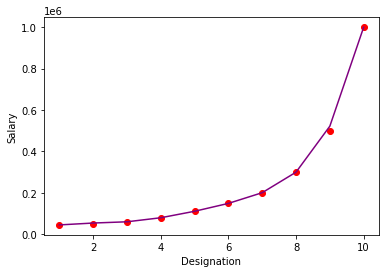

In [50]:
X = df.iloc[:,1:2]
plt.scatter(X, Y, c = 'red')
plt.plot(X, PR5.predict(PF.fit_transform(X)), c = 'purple')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [51]:
level = float(input())
PR5.predict(PF.fit_transform([[level]]))

6.5


array([[171803.58400087]])